# SAA Polygon Definition Check - ACD LRS

### Robert Cameron
### May 2021

In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import equalize_hist

/Users/rac/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/rac/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# get Simone Maldera's data files of geo coordinates where LAT rates go too high near the SAA:
# outCoords_NormRateEvtsBeforeCuts > 1.2 = cuts*.txt = rate of events downloaded from the LAT
# outCoords_NormRateEvtsBeforeFilters > 1.24 = trigs*.txt = the rate of LAT triggers

indir='/Users/rac/Documents/GLAST/ISOC/LATmetrics/saa/update-polygon/'
cuts20 = 'cuts-2020-SAA.txt'
cuts21 = 'cuts-2021-SAA.txt'
trigs20 = 'trigs-2020-SAA.txt'
trigs21 = 'trigs-2021-SAA.txt'
cuts21 = Table.read(indir+cuts21, format = 'ascii')
cuts21lat = cuts21['col2']
cuts21lon = cuts21['col3']
trigs21 = Table.read(indir+trigs21, format = 'ascii')
trigs21lat = trigs21['col2']
trigs21lon = trigs21['col3']
min(cuts21['col5']), min(trigs21['col5'])

(1.22, 1.25)

In [3]:
# get ACD LRS FITS file(s), for the months of 05 = 2021 May, and 06 = 2021 June
det = "ACD"
indir='/Users/rac/Documents/GLAST/ISOC/LATmetrics/saa/update-polygon/acdlrs/'
infile05='ACDlrs202105.fits'
infile06='ACDlrs202106.fits'
infile07='ACDimg202107.fits'

# the mask FITS image masks the SAA region, to allow only data from the SAA region to be used
mask1file = 'mask1.FITS'

In [4]:
# open and read FITS files
hdu05 = fits.open(indir+infile05)
###hdu06 = fits.open(indir+infile06)
hdu07 = fits.open(indir+infile07)
hdumask1 = fits.open(indir+mask1file)
#hdu05.info(), hdu07.info(), hdumask1.info()

In [5]:
# FITS 4D cube data four axes are: 
# 1 (len = 3): (0=Nsamples, 1=LRSval, 2=intTime)
# 2 (len = 108): ACD Channel
# 3 (len = 53): latitude (-26 to +26) (1-deg pixels)
# 4 (len = 361): longitude (-180 to +180) (1-deg pixels)
# LON LAT CHAN COUNT TOTVAL TOTINT

image05 = hdu05[0].data
###image06 = hdu06[0].data
image07 = hdu07[0].data
mask1 = hdumask1[0].data
m = mask1
np.shape(image05), np.shape(image07), np.shape(m)

((3, 108, 53, 361), (3, 108, 53, 361), (53, 361))

In [6]:
# work with average images
# useful ACD LRS counter channels: 
# 0..24 = top
# 27..42 = side
# 45..60 = side
# 63..78 = side
# 81..96 = side
# 99..106 = ribbons
# 107 = total of all tiles

# work with channel 107 = total of all tiles

#normalize the LRS count image by the integration time image (pixel by pixel)
im05=image05[1,107,:,:]/image05[2,107,:,:]

# mask the images
mim05=image05[1,107,:,:]*m

# trim the size of the images
tim05=im05[:,60:240]

np.shape(im05),np.shape(tim05), np.sum(im05), np.sum(mim05), np.sum(tim05), mim05[10,10],mim05[3,70],mim05[30,140]

((53, 361),
 (53, 180),
 5796966.331642083,
 868959.0,
 2579840.238904557,
 0.0,
 0.0,
 1639.0)

In [7]:
# work with average images
# useful ACD LRS counter channels: 
# 0..24 = top
# 27..42 = side
# 45..60 = side
# 63..78 = side
# 81..96 = side
# 99..106 = ribbons
# 107 = total of all tiles

# work with channel 107 = total of all tiles

#normalize the LRS count image by the integration time image (pixel by pixel)
im07=image07[1,107,:,:]/image07[2,107,:,:]

# mask the images
mim07=image07[1,107,:,:]*m

# trim the size of the images
tim07=im07[:,60:240]

np.shape(im07),np.shape(tim07), np.sum(im07), np.sum(mim07), np.sum(tim07), mim07[10,10],mim07[3,70],mim07[30,140]

/Users/rac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in true_divide
/Users/rac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in true_divide


((53, 361), (53, 180), nan, 5770933.0, nan, 0.0, 0.0, 5.0)

In [8]:
# Current LAT SAA polygon 
llon = np.array([ 33.9,  24.5, -18.6, -25.7, -36.0, -42.0, -58.8, -93.1, -97.5, -98.5, -92.1, -86.1,  33.9])
llat = np.array([-30.0, -22.6,   2.5,   5.2,   5.2,   4.6,   0.7,  -8.6,  -9.9, -12.5, -21.7, -30.0, -30.0])

# Current GBM SAA polygon
# 20 July 2010
gbmlon = np.array([ 33.9,  12.398, -9.103, -30.605, -38.4, -45.0, -65.0, -84.0,  -89.2,   -94.3,   -94.3,   -86.1])
gbmlat = np.array([-30.0, -19.867, -9.733,   0.4,     2.0,   2.0,  -1.0,  -6.155, -8.880, -14.220, -18.404, -30.0])

# New LAT SAA polygon 
nllon = np.array([ 33.9, -30.0, -36.0, -42.0, -58.8, -97.5, -98.5, -86.1, -60.0, -40.0, -20.0,   0.0,  33.9])
nllat = np.array([-30.0,   3.0,   4.6,   4.6,   0.7,  -9.9, -12.5, -30.0, -30.0, -30.0, -30.0, -30.0, -30.0])

# New LAT SAA polygon - interim
nllonint = np.array([ 33.9, -27.7, -36.0, -42.0, -58.8, -97.5, -98.5, -86.1, -60.0, -40.0, -20.0,   0.0,  33.9])
nllatint = np.array([-30.0,   4.3,   4.9,   4.6,   0.7,  -9.9, -12.5, -30.0, -30.0, -30.0, -30.0, -30.0, -30.0])

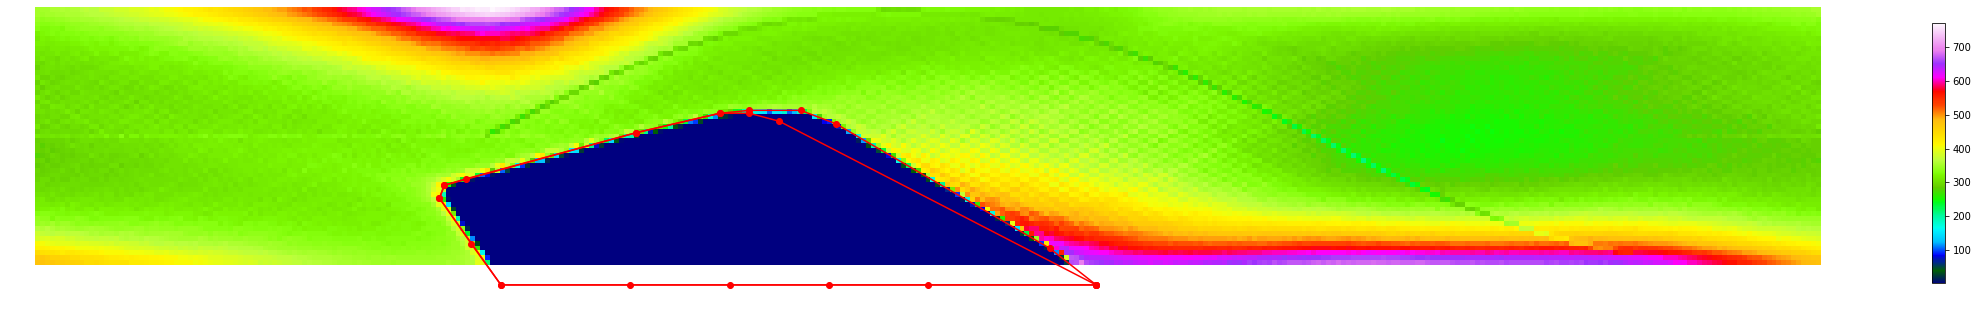

In [9]:
fig, ax = plt.subplots(1,1,sharex=True,sharey=True,figsize=(40,16))
plt.axis('off')
#eq = equalize_hist(im05)
#plt.imshow(np.sqrt(tim05),cmap='gray',origin='lower')
im = ax.imshow(im05,origin='lower',cmap='gist_ncar',extent=[-180,180,-26,26])
ax.plot(llon,llat,"o-",color='r',label='LAT')
ax.plot(nllon,nllat,"o-",color='r',label='NEWLAT')
fig.colorbar(im,shrink = 0.3)

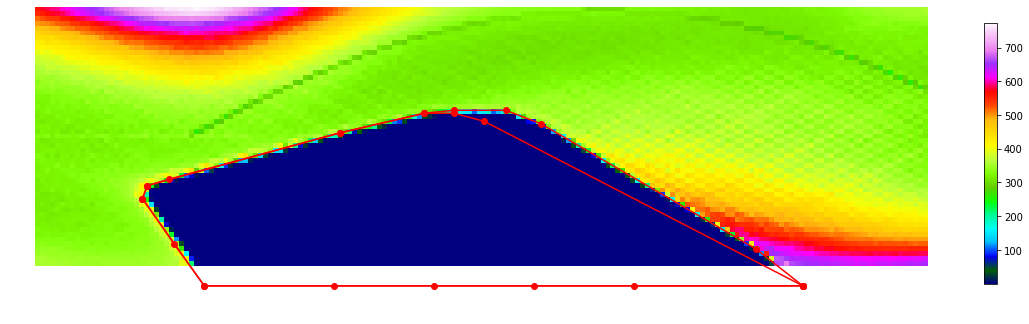

In [10]:
fig, ax = plt.subplots(1,1,sharex=True,sharey=True,figsize=(20,8))
plt.axis('off')
#eq = equalize_hist(im05)
#plt.imshow(np.sqrt(tim05),cmap='gray',origin='lower')
im = ax.imshow(tim05,origin='lower',cmap='gist_ncar',extent=[-120,59,-26,26])
ax.plot(llon,llat,"o-",color='r',label='LAT')
ax.plot(nllon,nllat,"o-",color='r',label='NEWLAT')
fig.colorbar(im,shrink = 0.6)

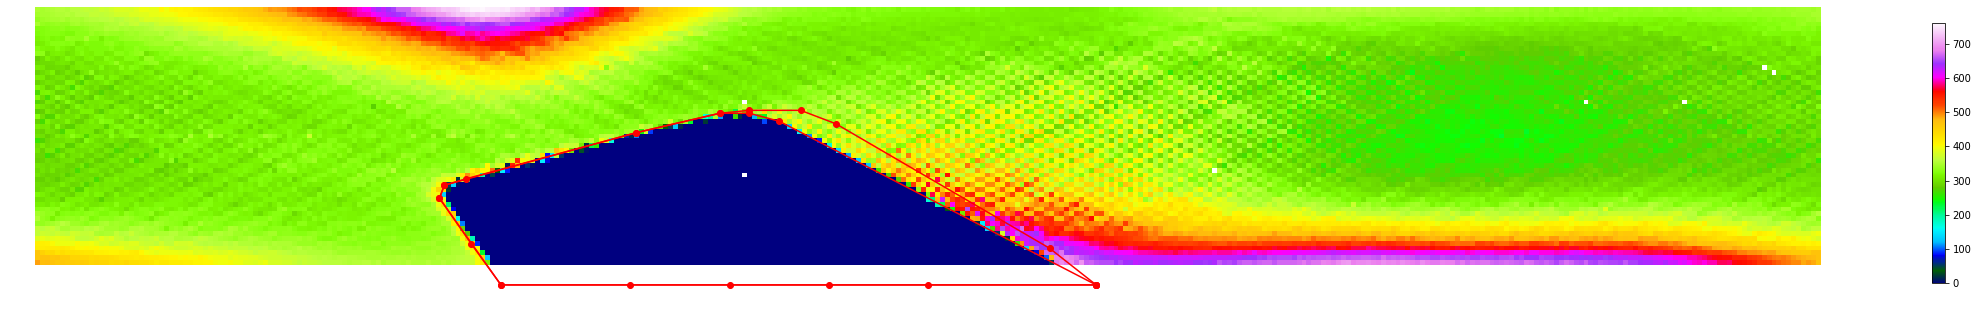

In [11]:
fig, ax = plt.subplots(1,1,sharex=True,sharey=True,figsize=(40,16))
plt.axis('off')
#eq = equalize_hist(im07)
#plt.imshow(np.sqrt(tim07),cmap='gray',origin='lower')
im = ax.imshow(im07,origin='lower',cmap='gist_ncar',extent=[-180,180,-26,26])
ax.plot(llon,llat,"o-",color='r',label='LAT')
ax.plot(nllon,nllat,"o-",color='r',label='NEWLAT')
fig.colorbar(im,shrink = 0.3)

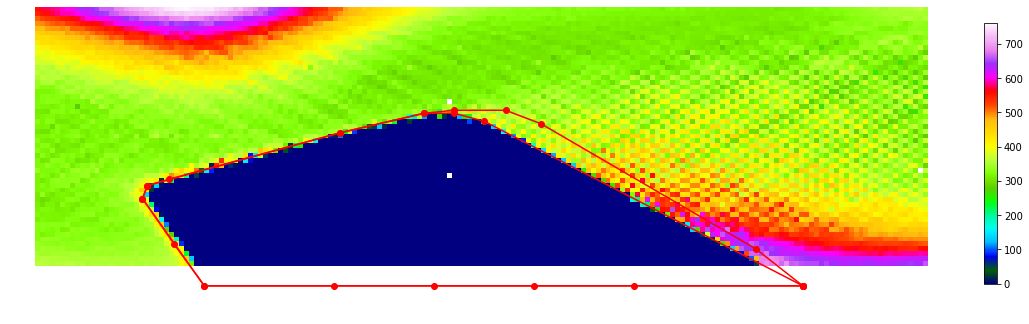

In [12]:
fig, ax = plt.subplots(1,1,sharex=True,sharey=True,figsize=(20,8))
plt.axis('off')
#eq = equalize_hist(im07)
#plt.imshow(np.sqrt(tim07),cmap='gray',origin='lower')
im = ax.imshow(tim07,origin='lower',cmap='gist_ncar',extent=[-120,59,-26,26])
ax.plot(llon,llat,"o-",color='r',label='LAT')
ax.plot(nllon,nllat,"o-",color='r',label='NEWLAT')
fig.colorbar(im,shrink = 0.6)

In [13]:
# LRS check regions

# New polygon check region
xlon0 = np.array([ 33.9, -26.0, -32.0,   33.9])
#xlon0 = np.array([ 33.9, -26.0, -31.0,   33.9])
xlat0 = np.array([-30.0,   4.9,  4.9,   -30.0])
# 3 Bounding equations:
# lat < 5.0
# lon > slopea*lat + offseta, where slopea = (-33.0 - 33.9)/(5.0 + 30.0); offseta = -5.0/slopea - 33.0
# lon < slopeb*lat + offsetb, where slopeb = (-26.0 - 33.9)/(5.0 + 30.0); offsetb = -5.0/slopeb - 26.0
mA0 = (xlat0[2] - xlat0[3])/(xlon0[2] - xlon0[3])
cA0 = xlat0[2] - xlon0[2]*mA0
mB0 = (xlat0[0] - xlat0[1])/(xlon0[0] - xlon0[1])
cB0 = xlat0[1] - xlon0[1]*mB0

# Old polygon check region
xlon1 = np.array([ 37.9, -15.0, -21.5,  37.9])
#xlon1 = np.array([ 37.9, -15.0, -20.0,  37.9])
xlat1 = np.array([-30.0,   4.9,  4.9,  -30.0])
# 3 Bounding equations: 
# lat < 5.0
# lon > slopea*lat + offseta, where slopea = (-22.0 - 38.0)/(5.0 + 30.0); offseta = -5.0/slopea - 22.0
# lon < slopeb*lat + offsetb, where slopeb = (-15.0 - 38.0)/(5.0 + 30.0); offsetb = -5.0/slopeb - 15.0
mA1 = (xlat1[2] - xlat1[3])/(xlon1[2] - xlon1[3])
cA1 = xlat1[2] - xlon1[2]*mA1
mB1 = (xlat1[0] - xlat1[1])/(xlon1[0] - xlon1[1])
cB1 = xlat1[1] - xlon1[1]*mB1

mA0, cA0, mB0, cB0, mA1, cA1, mB1, cB1

(-0.5295902883156297,
 -12.04688922610015,
 -0.5826377295492488,
 -10.248580968280468,
 -0.5875420875420876,
 -7.732154882154882,
 -0.6597353497164461,
 -4.996030245746692)

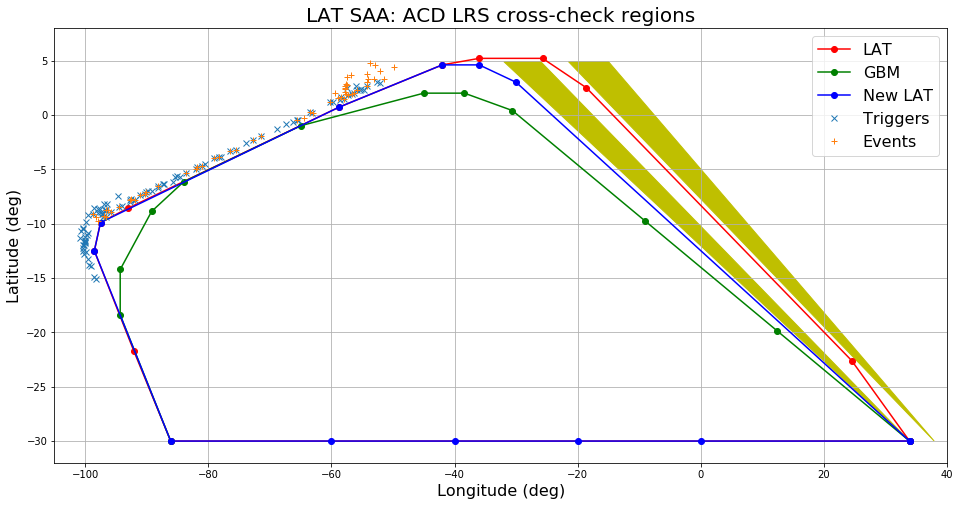

In [14]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(llon,llat,"o-",color='r',label='LAT')
ax.plot(gbmlon,gbmlat,"o-",color='g',label='GBM')
ax.plot(nllon,nllat,"o-",color='b',label='New LAT')
ax.fill(xlon0,xlat0,"o-",color='y')
ax.fill(xlon1,xlat1,"o-",color='y')
ax.plot(trigs21lon,trigs21lat,'x',label='Triggers')
ax.plot(cuts21lon,cuts21lat,'+',label='Events')

#ax.plot(xrlon,xrlat,',',color='k',label='LRS')
plt.xlim([-105,40])
plt.ylim([-32,8])
plt.title('LAT SAA: ACD LRS cross-check regions', size=20)
plt.xlabel('Longitude (deg)',size=16)
plt.ylabel('Latitude (deg)',size=16)
plt.legend(fontsize=16,loc='upper right')
ax.grid()

In [15]:
# get "xregions.dat" data files of LRS data values in "check-regions" near the Old and New SAA polygons
# example line in the file:
# N -15.590 2.532 641541530.956947 31 0 1 0.100067

xfile='/Users/rac/Documents/GLAST/ISOC/LATmetrics/saa/update-polygon/acdlrs/xregions202107.dat'
xregs = Table.read(xfile, format = 'ascii')
xron = xregs['col1']
xrlat = xregs['col2']
xrlon = xregs['col3']
xrval = xregs['col6']
xrflag = xregs['col7']
min(xrval), max(xrval), min(xrlat), max(xrlat), min(xrlon), max(xrlon)

(0, 789, -25.57, 4.896, -31.537, 31.114)

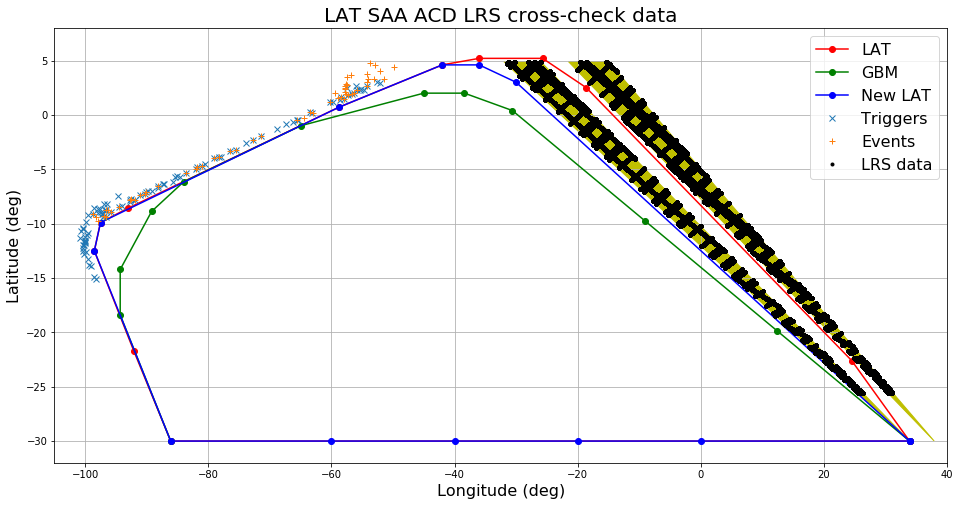

In [16]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(llon,llat,"o-",color='r',label='LAT')
ax.plot(gbmlon,gbmlat,"o-",color='g',label='GBM')
ax.plot(nllon,nllat,"o-",color='b',label='New LAT')
ax.fill(xlon0,xlat0,"o-",color='y')
ax.fill(xlon1,xlat1,"o-",color='y')
ax.plot(trigs21lon,trigs21lat,'x',label='Triggers')
ax.plot(cuts21lon,cuts21lat,'+',label='Events')

ax.plot(xrlon,xrlat,'.',color='k',label='LRS data')
plt.xlim([-105,40])
plt.ylim([-32,8])
plt.title('LAT SAA ACD LRS cross-check data', size=20)
plt.xlabel('Longitude (deg)',size=16)
plt.ylabel('Latitude (deg)',size=16)
plt.legend(fontsize=16)
ax.grid()

NameError: name 'newlon' is not defined

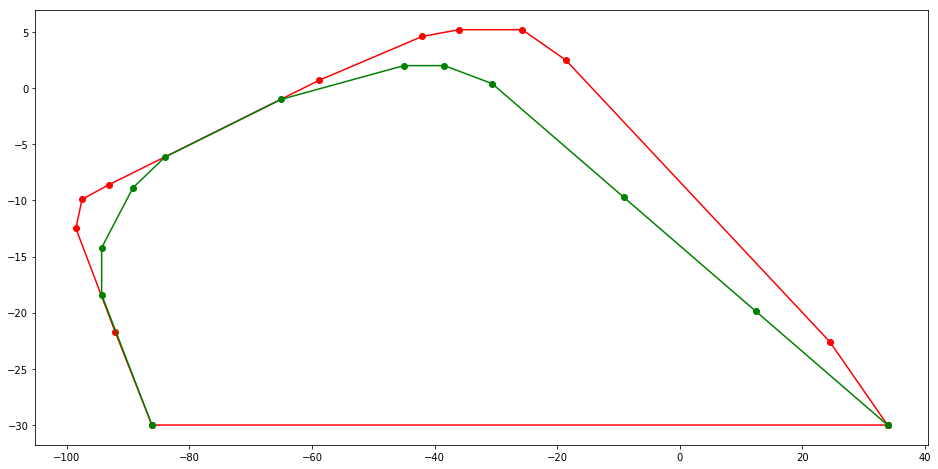

In [17]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(llon,llat,"o-",color='r',label='LAT')
ax.plot(gbmlon,gbmlat,"o-",color='g',label='GBM')
ax.plot(newlon,newlat,"o-",color='b',label='New LAT')
ax.plot(newlonint,newlatint,"o-",color='k',label='Interim New LAT')
ax.plot(trigs21lon,trigs21lat,'x',label='Triggers')
ax.plot(cuts21lon,cuts21lat,'+',label='Events')
plt.xlim([-105,40])
plt.ylim([-32,8])
plt.title('LAT SAA Options', size=20)
plt.xlabel('Longitude (deg)',size=16)
plt.ylabel('Latitude (deg)',size=16)
plt.legend(fontsize=16)
ax.grid()

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(llon,llat,"o-",color='r',label='LAT')
ax.plot(gbmlon,gbmlat,"o-",color='g',label='GBM')
ax.plot(altnewlon,altnewlat,"o-",color='k',label='Alt New LAT')
ax.plot(altnewlonint,altnewlatint,"o-",color='k',label='Interim Alt New LAT')
ax.plot(trigs21lon,trigs21lat,'x',label='Triggers')
ax.plot(cuts21lon,cuts21lat,'+',label='Events')
plt.xlim([-105,40])
plt.ylim([-32,8])
plt.title('LAT SAA Options', size=20)
plt.xlabel('Longitude (deg)',size=16)
plt.ylabel('Latitude (deg)',size=16)
plt.legend(fontsize=16)
ax.grid()

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(llon,llat,"o-",color='r',label='LAT')
ax.plot(gbmlon,gbmlat,"o-",color='g',label='GBM')
ax.plot(alt2newlon,alt2newlat,"o-",color='c',label='Alt 2 New LAT')
ax.plot(alt2newlonint,alt2newlatint,"o-",color='k',label='Interim Alt 2 New LAT')
ax.plot(trigs21lon,trigs21lat,'x',label='Triggers')
ax.plot(cuts21lon,cuts21lat,'+',label='Events')
plt.xlim([-105,40])
plt.ylim([-32,8])
plt.title('LAT SAA Options', size=20)
plt.xlabel('Longitude (deg)',size=16)
plt.ylabel('Latitude (deg)',size=16)
plt.legend(fontsize=16)
ax.grid()

In [ ]:
# look at GEM EBM event rate images

indir='/Users/rac/Documents/GLAST/ISOC/LATmetrics/saa/update-polygon/gemevts/'

gemfile21='revts2021.fits'
gemhdu21 = fits.open(indir+gemfile21)
gemimg21 = gemhdu21[0].data
gemim21 = gemimg21[0,:,:]
np.shape(gemim21)

In [ ]:
# show GEM EBM event rate image for 202

fig, ax = plt.subplots(figsize=(20, 3))
im = ax.imshow(np.sqrt(gemim21),origin='lower',cmap='flag',)
fig.colorbar(im, ax=ax)
plt.title('GEM EBM Event Rate, Year = 2021', size=20)
plt.xlabel('Relative Longitude (deg)',size=16)
plt.ylabel('Relative Latitude (deg)',size=16)
ax.grid()

In [ ]:
# show GEM EBM event rate image for 2021

fig, ax = plt.subplots(figsize=(20, 3))
im = ax.imshow(gemim21,origin='lower',cmap='gist_ncar',vmin=0,vmax=4e3)
fig.colorbar(im, ax=ax)
plt.title('GEM EBM Event Rate, Year = 2021', size=20)
plt.xlabel('Relative Longitude (deg)',size=16)
plt.ylabel('Relative Latitude (deg)',size=16)
ax.grid()